# Weighted Least Squares - Code Examples

## Example 1. Non-Linear Example

This example we reviewed previously in the least squares regression topic. In this example, we do not provide any information about y-axis errors for each data point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# 1. Define the function to fit
def custom_function(x, A, B):
    """
    The custom function to approximate the data.
    f(x; A, B) = A * (np.exp(-B * x) - 1) + 100
    """
    return A * (np.exp(-B * x) - 1) + 100

In [3]:
# 2. Prepare the datasets
# Dataset 1
data1_x = np.array([0, 5, 25, 34, 42, 57, 97])
data1_y = np.array([100, 79.7, 51.3, 44.6, 39.8, 29.9, 10.3])

# Dataset 2
data2_x = np.array([0, 19, 45, 104, 191, 294, 391])
data2_y = np.array([100, 80.4, 66.4, 50.1, 41.2, 28.5, 20.1])

# Dataset 3
data3_x = np.array([0, 23, 51, 98, 196, 292, 401])
data3_y = np.array([100, 87.8, 77, 65.7, 50.9, 46.5, 44.4])

# Combine datasets into a list for easier iteration
datasets = [
    {"name": "Dataset 1", "x": data1_x, "y": data1_y},
    {"name": "Dataset 2", "x": data2_x, "y": data2_y},
    {"name": "Dataset 3", "x": data3_x, "y": data3_y},
]

In [4]:
# 3. Perform curve fitting and analysis for each dataset
results = []

for i, dataset in enumerate(datasets):
    print(f"\n--- Fitting {dataset['name']} ---")
    x_data = dataset["x"]
    y_data = dataset["y"]

    # Initial guess for parameters A and B
    # It's important to provide reasonable initial guesses for non-linear fitting
    # Based on the function A * (exp(-B*x) - 1) + 100:
    # When x=0, y = A * (exp(0) - 1) + 100 = A * (1 - 1) + 100 = 100.
    # This means the function always starts at 100 for x=0, which matches our data.
    # For large x, exp(-B*x) approaches 0, so y approaches A * (-1) + 100 = 100 - A.
    # If y decreases, A must be positive.
    # B determines the decay rate; a small positive B means slow decay.
    # Let's try initial guesses, e.g., A=50, B=0.01
    initial_guess = [50, 0.01]

    try:
        # curve_fit returns:
        # popt: Optimal values for the parameters so that the sum of the squared residuals is minimized.
        # pcov: The estimated covariance of popt.
        popt, pcov = curve_fit(custom_function, x_data, y_data, p0=initial_guess)
        A_fit, B_fit = popt

        # Calculate standard errors from the covariance matrix
        # The diagonal elements of pcov are the variances of the parameters
        perr = np.sqrt(np.diag(pcov))
        A_err, B_err = perr

        print(f"Fitted parameters: A = {A_fit:.4f} +/- {A_err:.4f}, B = {B_fit:.4f} +/- {B_err:.4f}")

        # Check condition number of the covariance matrix
        print(f"Condition number of the covariance matrix: {np.linalg.cond(pcov):.2f}")

        # Generate predicted y values using the fitted function
        y_predicted = custom_function(x_data, A_fit, B_fit)

        # Calculate metrics
        # Sum of Squared Residuals (SSR)
        ssr = np.sum((y_data - y_predicted)**2)
        print(f"Sum of Squared Residuals (SSR): {ssr:.4f}")

        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_data, y_predicted))
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

        # Total Sum of Squares (SST)
        y_mean = np.mean(y_data)
        sst = np.sum((y_data - y_mean)**2)
        print(f"Total Sum of Squares (TSS): {sst:.4f}")

        # R-squared (Coefficient of Determination)
        # Using sklearn's r2_score for convenience, which calculates 1 - (SSR/TSS)
        r_squared = r2_score(y_data, y_predicted)
        print(f"R-squared: {r_squared:.4f}")

        # Adjusted R-squared calculation
        n = len(x_data) # Number of data points
        k = len(popt)  # Number of parameters (A, B)
        # Ensure n - k - 1 is not zero or negative to avoid division by zero
        if (n - k - 1) > 0:
            adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
            print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
        else:
            adjusted_r_squared = np.nan # Not applicable if degrees of freedom are insufficient
            print("Adjusted R-squared: Not applicable (insufficient degrees of freedom)")

        Value_for_x_0 = custom_function(0, A_fit, B_fit)
        print(f"Value for x=0 (Expected value is 100): {Value_for_x_0:.4f}")

        results.append({
            "name": dataset["name"],
            "x_data": x_data,
            "y_data": y_data,
            "y_predicted": y_predicted,
            "A_fit": A_fit,
            "B_fit": B_fit,
            "A_err": A_err, # Store errors
            "B_err": B_err, # Store errors
            "ssr": ssr,
            "rmse": rmse,
            "r_squared": r_squared,
            "adjusted_r_squared": adjusted_r_squared # Store adjusted R-squared
        })

    except RuntimeError as e:
        print(f"Error: Could not fit curve for {dataset['name']}. {e}")
        results.append({
            "name": dataset["name"],
            "x_data": x_data,
            "y_data": y_data,
            "error": str(e)
        })


--- Fitting Dataset 1 ---
Fitted parameters: A = 93.5355 +/- 7.6189, B = 0.0270 +/- 0.0048
Condition number of the covariance matrix: 17123879.75
Sum of Squared Residuals (SSR): 111.1352
Root Mean Squared Error (RMSE): 3.9845
Total Sum of Squares (TSS): 5492.6000
R-squared: 0.9798
Adjusted R-squared: 0.9696
Value for x=0 (Expected value is 100): 100.0000

--- Fitting Dataset 2 ---
Fitted parameters: A = 75.2997 +/- 4.3607, B = 0.0110 +/- 0.0020
Condition number of the covariance matrix: 11211875.75
Sum of Squared Residuals (SSR): 134.1877
Root Mean Squared Error (RMSE): 4.3783
Total Sum of Squares (TSS): 4934.4171
R-squared: 0.9728
Adjusted R-squared: 0.9592
Value for x=0 (Expected value is 100): 100.0000

--- Fitting Dataset 3 ---
Fitted parameters: A = 56.6753 +/- 0.5420, B = 0.0099 +/- 0.0003
Condition number of the covariance matrix: 9732599.47
Sum of Squared Residuals (SSR): 1.8090
Root Mean Squared Error (RMSE): 0.5084
Total Sum of Squares (TSS): 2811.9943
R-squared: 0.9994
Adju

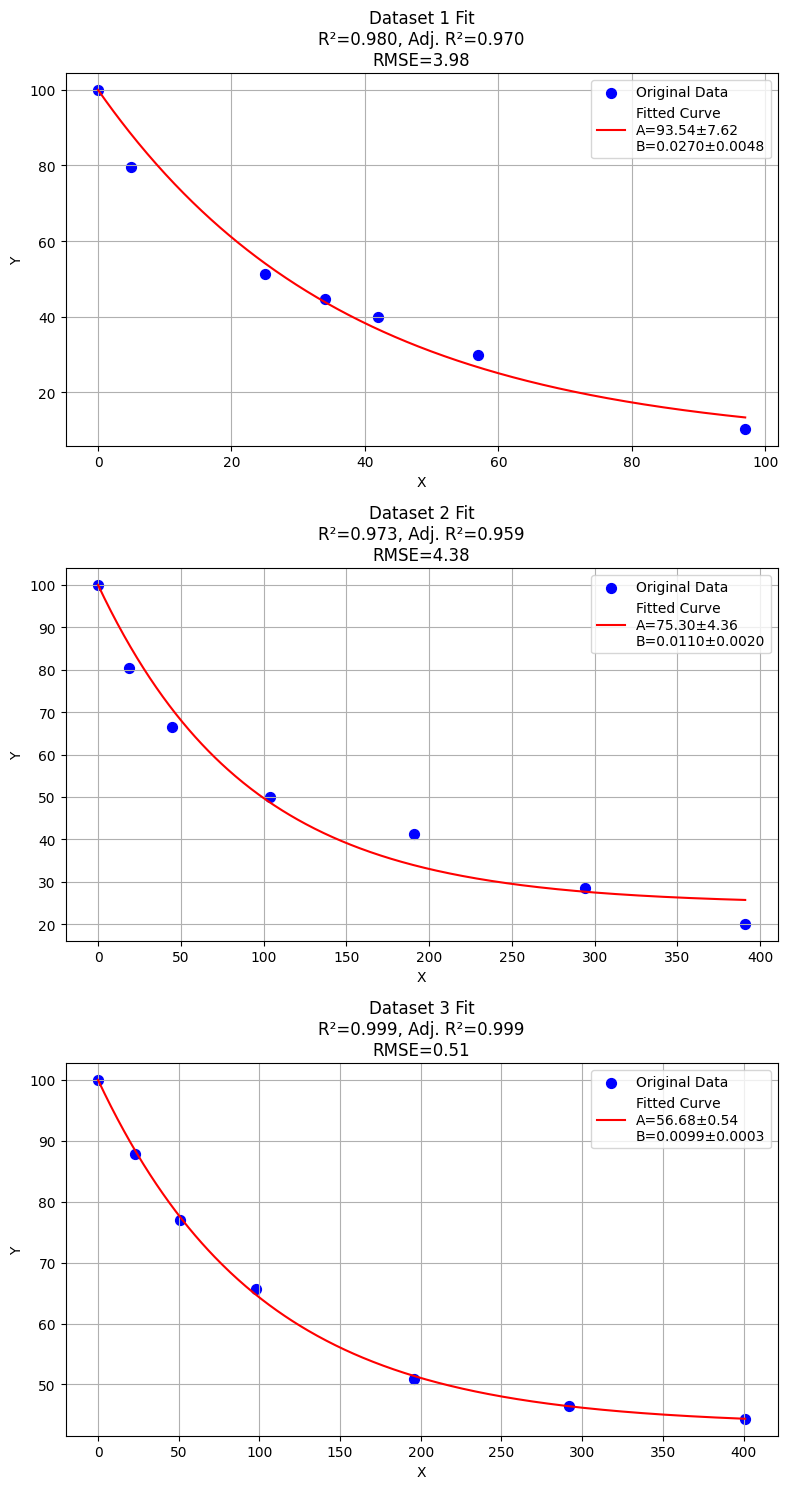

In [5]:
# 4. Plotting the results
plt.figure(figsize=(8, 15))

for i, res in enumerate(results):
    plt.subplot(len(results), 1, i + 1)
    plt.scatter(res["x_data"], res["y_data"], label="Original Data", color='blue', s=50)

    if "y_predicted" in res:
        # Create a smoother curve for plotting
        x_plot = np.linspace(min(res["x_data"]), max(res["x_data"]), 500)
        y_plot = custom_function(x_plot, res["A_fit"], res["B_fit"])
        plt.plot(x_plot, y_plot, color='red', label=f"Fitted Curve\nA={res['A_fit']:.2f}±{res['A_err']:.2f}\nB={res['B_fit']:.4f}±{res['B_err']:.4f}")
        
        if not np.isnan(res['adjusted_r_squared']):
            plt.title(f"{res['name']} Fit\nR²={res['r_squared']:.3f}, Adj. R²={res['adjusted_r_squared']:.3f}\nRMSE={res['rmse']:.2f}")
        else:
            plt.title(f"{res['name']} Fit\nR²={res['r_squared']:.3f}, RMSE={res['rmse']:.2f}\nAdj. R²: N/A")
    else:
        plt.title(f"{res['name']} (Fit Error)")
        plt.text(0.5, 0.5, f"Error: {res['error']}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## Example 2. Non-Linear Example with Y-axis Errors with Negligible Standard Deviation for the First Point

Here we assume that the Y-value for x=0 should be equal to 100, so the error for this y data point is close to zero. For the remaining points, we expect errors to be the same and equal to 0.5. Thus, standard deviation is $\sigma_{i} = 0.5$ for each data point except the first one.

We set `sigma` array as `[1e-9, 0.5, 0.5, 0.5, ...]`. The first point with `sigma = 1e-9` gets an extremely large weight, forcing the fitted curve to pass almost exactly through that point. This value is chosen to be practically zero, thereby assigning an exceptionally large weight to this data point in the minimization process, compelling the fitted curve to pass almost exactly through $(x_1, y_1)$.

Based on the results, we will see why it was a bad idea to set negligible value of the standard deviation for the first point.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
# 1. Define the function to fit
def custom_function(x, A, B):
    """
    The custom function to approximate the data.
    f(x; A, B) = A * (np.exp(-B * x) - 1) + 100
    """
    return A * (np.exp(-B * x) - 1) + 100

In [8]:
# 2. Prepare the datasets
# Dataset 1
data1_x = np.array([0, 5, 25, 34, 42, 57, 97])
data1_y = np.array([100, 79.7, 51.3, 44.6, 39.8, 29.9, 10.3])

# Dataset 2
data2_x = np.array([0, 19, 45, 104, 191, 294, 391])
data2_y = np.array([100, 80.4, 66.4, 50.1, 41.2, 28.5, 20.1])

# Dataset 3
data3_x = np.array([0, 23, 51, 98, 196, 292, 401])
data3_y = np.array([100, 87.8, 77, 65.7, 50.9, 46.5, 44.4])

# Combine datasets into a list for easier iteration
datasets = [
    {"name": "Dataset 1", "x": data1_x, "y": data1_y},
    {"name": "Dataset 2", "x": data2_x, "y": data2_y},
    {"name": "Dataset 3", "x": data3_x, "y": data3_y},
]

In [9]:
# 3. Perform curve fitting and analysis for each dataset
results = []

for i, dataset in enumerate(datasets):
    print(f"\n--- Fitting {dataset['name']} ---")
    x_data = dataset["x"]
    y_data = dataset["y"]

    # Define sigma for Weighted Least Squares
    # First point (Y=100) has no error, assign a very small sigma to give it high weight
    # Other points have an error of +/- 0.5
    sigma = np.full_like(y_data, 0.5, dtype=float)
    sigma[0] = 1e-9  # Very small error for the first point
    print(f"Sigma for {dataset['name']}: {sigma}")


    # Initial guess for parameters A and B
    initial_guess = [50, 0.01]

    try:
        # curve_fit returns:
        # popt: Optimal values for the parameters so that the sum of the squared residuals is minimized.
        # pcov: The estimated covariance of popt.
        # Use sigma for weighted least squares
        popt, pcov = curve_fit(custom_function, x_data, y_data, p0=initial_guess, sigma=sigma, absolute_sigma=True)
        A_fit, B_fit = popt

        # Calculate standard errors from the covariance matrix
        perr = np.sqrt(np.diag(pcov))
        A_err, B_err = perr

        print(f"Fitted parameters: A = {A_fit:.4f} +/- {A_err:.4f}, B = {B_fit:.4f} +/- {B_err:.4f}")

        # Check condition number of the covariance matrix
        print(f"Condition number of the covariance matrix: {np.linalg.cond(pcov):.2f}")

        # Generate predicted y values using the fitted function
        y_predicted = custom_function(x_data, A_fit, B_fit)

        # Calculate metrics
        # Sum of Squared Residuals (SSR)
        ssr = np.sum((y_data - y_predicted)**2)
        print(f"Sum of Squared Residuals (SSR): {ssr:.4f}")

        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_data, y_predicted))
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

        # Total Sum of Squares (SST)
        y_mean = np.mean(y_data)
        sst = np.sum((y_data - y_mean)**2)
        print(f"Total Sum of Squares (TSS): {sst:.4f}")

        # R-squared (Coefficient of Determination)
        r_squared = r2_score(y_data, y_predicted)
        print(f"R-squared: {r_squared:.4f}")

        # Adjusted R-squared calculation
        n = len(x_data) # Number of data points
        k = len(popt)  # Number of parameters (A, B)
        if (n - k - 1) > 0:
            adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
            print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
        else:
            adjusted_r_squared = np.nan
            print("Adjusted R-squared: Not applicable (insufficient degrees of freedom)")

        # Chi-Squared and Reduced Chi-Squared Calculation
        # Degrees of freedom (nu)
        nu = n - k
        if nu > 0:
            # Chi-squared (weighted sum of squared residuals)
            chi_squared = np.sum(((y_data - y_predicted) / sigma)**2)
            print(fr"Chi-Squared ($\chi^2$): {chi_squared:.4f}")

            # Reduced Chi-squared
            reduced_chi_squared = chi_squared / nu
            print(fr"Reduced Chi-Squared ($\chi^2_{{red}}$): {reduced_chi_squared:.4f}")
        else:
            chi_squared = np.nan
            reduced_chi_squared = np.nan
            print("Chi-Squared: Not applicable (insufficient degrees of freedom)")

        Value_for_x_0 = custom_function(0, A_fit, B_fit)
        print(f"Value for x=0 (Expected value is 100): {Value_for_x_0:.4f}")

        results.append({
            "name": dataset["name"],
            "x_data": x_data,
            "y_data": y_data,
            "y_predicted": y_predicted,
            "A_fit": A_fit,
            "B_fit": B_fit,
            "A_err": A_err,
            "B_err": B_err,
            "ssr": ssr,
            "rmse": rmse,
            "r_squared": r_squared,
            "adjusted_r_squared": adjusted_r_squared,
            "chi_squared": chi_squared,
            "reduced_chi_squared": reduced_chi_squared
        })

    except RuntimeError as e:
        print(f"Error: Could not fit curve for {dataset['name']}. {e}")
        results.append({
            "name": dataset["name"],
            "x_data": x_data,
            "y_data": y_data,
            "error": str(e)
        })



--- Fitting Dataset 1 ---
Sigma for Dataset 1: [1.e-09 5.e-01 5.e-01 5.e-01 5.e-01 5.e-01 5.e-01]
Fitted parameters: A = 93.5355 +/- 0.8080, B = 0.0270 +/- 0.0005
Condition number of the covariance matrix: 17123879.75
Sum of Squared Residuals (SSR): 111.1352
Root Mean Squared Error (RMSE): 3.9845
Total Sum of Squares (TSS): 5492.6000
R-squared: 0.9798
Adjusted R-squared: 0.9696
Chi-Squared ($\chi^2$): 444.5407
Reduced Chi-Squared ($\chi^2_{red}$): 88.9081
Value for x=0 (Expected value is 100): 100.0000

--- Fitting Dataset 2 ---
Sigma for Dataset 2: [1.e-09 5.e-01 5.e-01 5.e-01 5.e-01 5.e-01 5.e-01]
Fitted parameters: A = 75.2997 +/- 0.4209, B = 0.0110 +/- 0.0002
Condition number of the covariance matrix: 11211875.75
Sum of Squared Residuals (SSR): 134.1877
Root Mean Squared Error (RMSE): 4.3783
Total Sum of Squares (TSS): 4934.4171
R-squared: 0.9728
Adjusted R-squared: 0.9592
Chi-Squared ($\chi^2$): 536.7508
Reduced Chi-Squared ($\chi^2_{red}$): 107.3502
Value for x=0 (Expected value

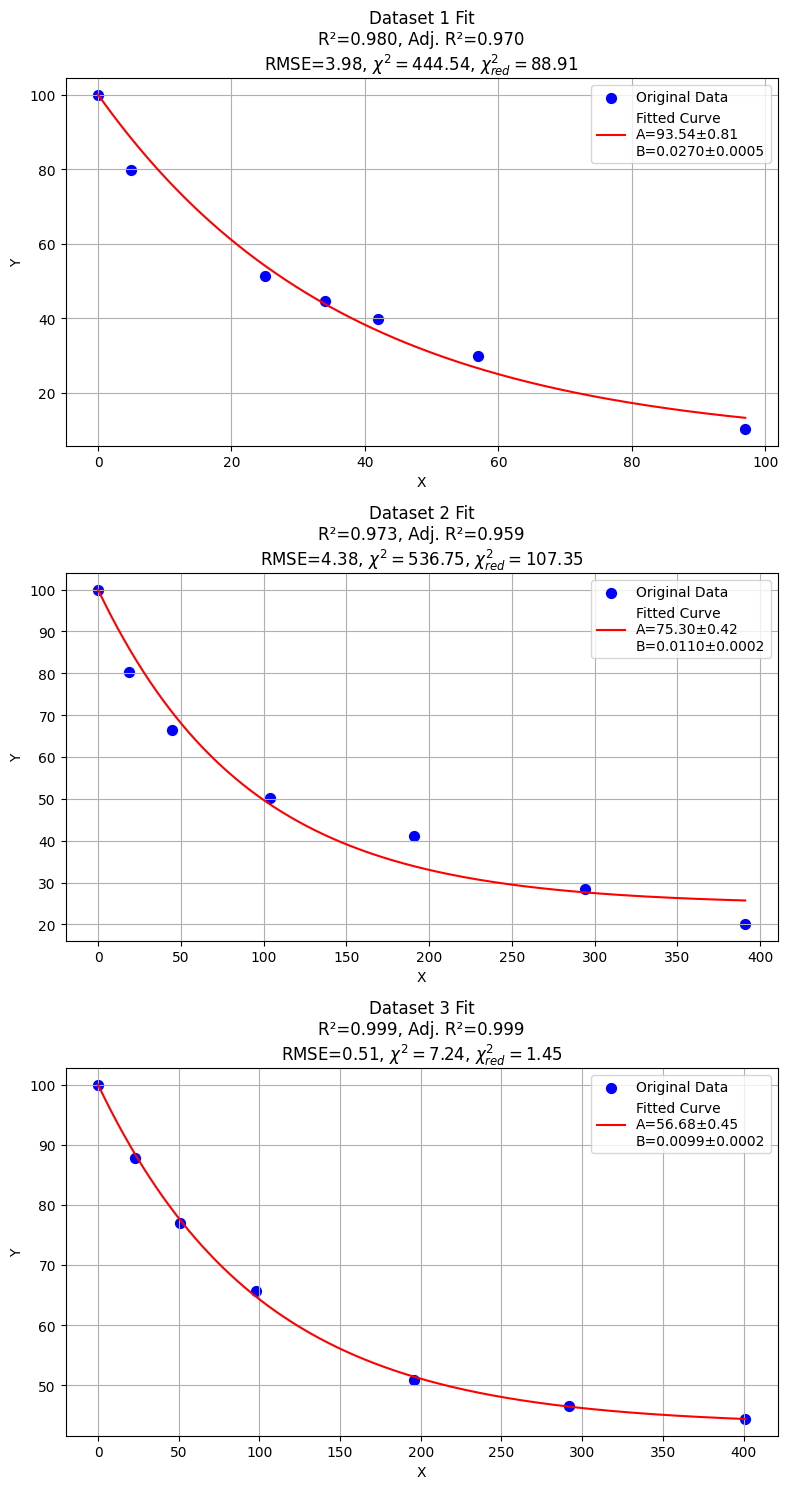

In [10]:
# 4. Plotting the results
plt.figure(figsize=(8, 15))

for i, res in enumerate(results):
    plt.subplot(len(results), 1, i + 1)
    plt.scatter(res["x_data"], res["y_data"], label="Original Data", color='blue', s=50)

    if "y_predicted" in res:
        x_plot = np.linspace(min(res["x_data"]), max(res["x_data"]), 500)
        y_plot = custom_function(x_plot, res["A_fit"], res["B_fit"])
        plt.plot(x_plot, y_plot, color='red', label=f"Fitted Curve\nA={res['A_fit']:.2f}±{res['A_err']:.2f}\nB={res['B_fit']:.4f}±{res['B_err']:.4f}")

        if not np.isnan(res['adjusted_r_squared']):
            plt.title(f"{res['name']} Fit\nR²={res['r_squared']:.3f}, Adj. R²={res['adjusted_r_squared']:.3f}\nRMSE={res['rmse']:.2f}, $\\chi^2={res['chi_squared']:.2f}$, $\\chi^2_{{red}}={res['reduced_chi_squared']:.2f}$")
        else:
            plt.title(f"{res['name']} Fit\nR²={res['r_squared']:.3f}, RMSE={res['rmse']:.2f}\nAdj. R²: N/A")
    else:
        plt.title(f"{res['name']} (Fit Error)")
        plt.text(0.5, 0.5, f"Error: {res['error']}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Obtained value of $\chi^2$ and $\chi^2_{red}$ are too large.

The first guess is we get such a result because of the very small value of the standard deviation for the first point. It may increase $\chi^2$ and $\chi^2_{red}$ significantly. We will double-check this below and will find out that the reason for such a behavior is different.

However, even if we're sure that the first y-value should be equal to 100 with a very good accuracy when $x = 0$, that's not a good idea to assign a very small value of standard deviation for this first data point. The best choice in this case is to assign to the first data point the same value of standard deviation as for all other points (0.5 in our case).

Thus, `sigma` array should be `[0.5, 0.5, 0.5, 0.5, ...]` for all the data points. After you identify all the model parameters, you can find how close the first predicted value of $y$ is to 100.

## Additional Notes

Regardless of whether you provide `sigma` or not, `scipy.optimize.curve_fit` internally uses a **Levenberg-Marquardt algorithm** by default to find the parameters that minimize the sum of squared residuals.

The key difference when `sigma` is provided is *what* the Levenberg-Marquardt algorithm minimizes:

* **Without `sigma` (OLS):** It minimizes the ordinary sum of squared residuals: $\sum (y_i - f(x_i, \beta))^2$.
* **With `sigma` (WLS):** It minimizes the **weighted sum of squared residuals**: $\sum w_i (y_i - f(x_i, \beta))^2$, where $w_i = 1 / \sigma_i^2$.

The Levenberg-Marquardt algorithm is an iterative numerical optimization algorithm. It cleverly switches between a steepest descent method (when far from the minimum) and the Gauss-Newton method (when close to the minimum) to efficiently converge to the optimal parameter values. When `sigma` is provided, the function being minimized (the objective function) simply changes from the unweighted sum of squares to the weighted sum of squares, but the core optimization algorithm remains Levenberg-Marquardt.

You can actually specify other optimization algorithms for `curve_fit` using the `method` parameter (e.g., `'trf'` for Trust Region Reflective, or `'dogbox'` for dogleg algorithm), but Levenberg-Marquardt (`'lm'`) is the default and often a good choice for non-linear least squares problems. The concept of weighting applies similarly regardless of the specific algorithm used for minimization, as long as that algorithm supports minimizing a weighted sum of squares.

## Example 3. Non-Linear Example with Y-axis Errors

This time, `sigma` array is `[0.5, 0.5, 0.5, 0.5, ...]` for all the data points.

In [11]:
# 3. Perform curve fitting and analysis for each dataset
results = []

for i, dataset in enumerate(datasets):
    print(f"\n--- Fitting {dataset['name']} ---")
    x_data = dataset["x"]
    y_data = dataset["y"]

    # Define sigma for Weighted Least Squares
    # First point (Y=100) has no error, assign a very small sigma to give it high weight
    # Other points have an error of +/- 0.5
    sigma = np.full_like(y_data, 0.5, dtype=float)
    print(f"Sigma for {dataset['name']}: {sigma}")


    # Initial guess for parameters A and B
    initial_guess = [50, 0.01]

    try:
        # curve_fit returns:
        # popt: Optimal values for the parameters so that the sum of the squared residuals is minimized.
        # pcov: The estimated covariance of popt.
        # Use sigma for weighted least squares
        popt, pcov = curve_fit(custom_function, x_data, y_data, p0=initial_guess, sigma=sigma, absolute_sigma=True)
        A_fit, B_fit = popt

        # Calculate standard errors from the covariance matrix
        perr = np.sqrt(np.diag(pcov))
        A_err, B_err = perr

        print(f"Fitted parameters: A = {A_fit:.4f} +/- {A_err:.4f}, B = {B_fit:.4f} +/- {B_err:.4f}")

        # Check condition number of the covariance matrix
        print(f"Condition number of the covariance matrix: {np.linalg.cond(pcov):.2f}")

        # Generate predicted y values using the fitted function
        y_predicted = custom_function(x_data, A_fit, B_fit)

        # Calculate metrics
        # Sum of Squared Residuals (SSR)
        ssr = np.sum((y_data - y_predicted)**2)
        print(f"Sum of Squared Residuals (SSR): {ssr:.4f}")

        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_data, y_predicted))
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

        # Total Sum of Squares (SST)
        y_mean = np.mean(y_data)
        sst = np.sum((y_data - y_mean)**2)
        print(f"Total Sum of Squares (TSS): {sst:.4f}")

        # R-squared (Coefficient of Determination)
        r_squared = r2_score(y_data, y_predicted)
        print(f"R-squared: {r_squared:.4f}")

        # Adjusted R-squared calculation
        n = len(x_data) # Number of data points
        k = len(popt)  # Number of parameters (A, B)
        if (n - k - 1) > 0:
            adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
            print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
        else:
            adjusted_r_squared = np.nan
            print("Adjusted R-squared: Not applicable (insufficient degrees of freedom)")

        # Chi-Squared and Reduced Chi-Squared Calculation
        # Degrees of freedom (nu)
        nu = n - k
        if nu > 0:
            # Chi-squared (weighted sum of squared residuals)
            chi_squared = np.sum(((y_data - y_predicted) / sigma)**2)
            print(fr"Chi-Squared ($\chi^2$): {chi_squared:.4f}")

            # Reduced Chi-squared
            reduced_chi_squared = chi_squared / nu
            print(fr"Reduced Chi-Squared ($\chi^2_{{red}}$): {reduced_chi_squared:.4f}")
        else:
            chi_squared = np.nan
            reduced_chi_squared = np.nan
            print("Chi-Squared: Not applicable (insufficient degrees of freedom)")

        Value_for_x_0 = custom_function(0, A_fit, B_fit)
        print(f"Value for x=0 (Expected value is 100): {Value_for_x_0:.4f}")

        results.append({
            "name": dataset["name"],
            "x_data": x_data,
            "y_data": y_data,
            "y_predicted": y_predicted,
            "A_fit": A_fit,
            "B_fit": B_fit,
            "A_err": A_err,
            "B_err": B_err,
            "ssr": ssr,
            "rmse": rmse,
            "r_squared": r_squared,
            "adjusted_r_squared": adjusted_r_squared,
            "chi_squared": chi_squared,
            "reduced_chi_squared": reduced_chi_squared
        })

    except RuntimeError as e:
        print(f"Error: Could not fit curve for {dataset['name']}. {e}")
        results.append({
            "name": dataset["name"],
            "x_data": x_data,
            "y_data": y_data,
            "error": str(e)
        })



--- Fitting Dataset 1 ---
Sigma for Dataset 1: [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Fitted parameters: A = 93.5355 +/- 0.8080, B = 0.0270 +/- 0.0005
Condition number of the covariance matrix: 17123879.75
Sum of Squared Residuals (SSR): 111.1352
Root Mean Squared Error (RMSE): 3.9845
Total Sum of Squares (TSS): 5492.6000
R-squared: 0.9798
Adjusted R-squared: 0.9696
Chi-Squared ($\chi^2$): 444.5407
Reduced Chi-Squared ($\chi^2_{red}$): 88.9081
Value for x=0 (Expected value is 100): 100.0000

--- Fitting Dataset 2 ---
Sigma for Dataset 2: [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Fitted parameters: A = 75.2997 +/- 0.4209, B = 0.0110 +/- 0.0002
Condition number of the covariance matrix: 11211875.75
Sum of Squared Residuals (SSR): 134.1877
Root Mean Squared Error (RMSE): 4.3783
Total Sum of Squares (TSS): 4934.4171
R-squared: 0.9728
Adjusted R-squared: 0.9592
Chi-Squared ($\chi^2$): 536.7508
Reduced Chi-Squared ($\chi^2_{red}$): 107.3502
Value for x=0 (Expected value is 100): 100.0000

--- Fitting Dataset 3 

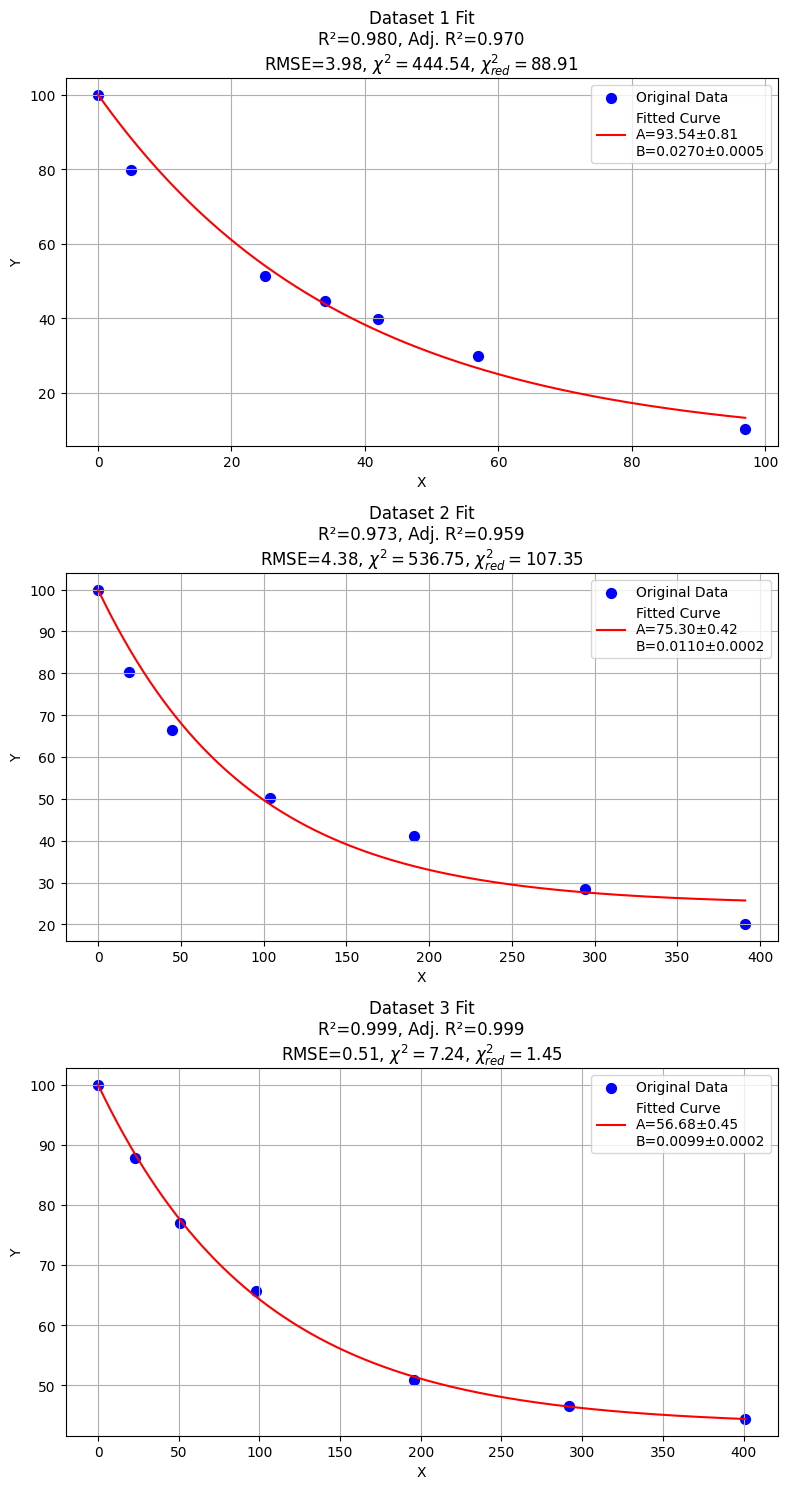

In [12]:
# 4. Plotting the results
plt.figure(figsize=(8, 15))

for i, res in enumerate(results):
    plt.subplot(len(results), 1, i + 1)
    plt.scatter(res["x_data"], res["y_data"], label="Original Data", color='blue', s=50)

    if "y_predicted" in res:
        x_plot = np.linspace(min(res["x_data"]), max(res["x_data"]), 500)
        y_plot = custom_function(x_plot, res["A_fit"], res["B_fit"])
        plt.plot(x_plot, y_plot, color='red', label=f"Fitted Curve\nA={res['A_fit']:.2f}±{res['A_err']:.2f}\nB={res['B_fit']:.4f}±{res['B_err']:.4f}")

        if not np.isnan(res['adjusted_r_squared']):
            plt.title(f"{res['name']} Fit\nR²={res['r_squared']:.3f}, Adj. R²={res['adjusted_r_squared']:.3f}\nRMSE={res['rmse']:.2f}, $\\chi^2={res['chi_squared']:.2f}$, $\\chi^2_{{red}}={res['reduced_chi_squared']:.2f}$")
        else:
            plt.title(f"{res['name']} Fit\nR²={res['r_squared']:.3f}, RMSE={res['rmse']:.2f}\nAdj. R²: N/A")
    else:
        plt.title(f"{res['name']} (Fit Error)")
        plt.text(0.5, 0.5, f"Error: {res['error']}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Analysis of the results

### Usage of the Higher Value of Errors